In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2024-07-15 13:33:20.745423: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/Users/akun/.local/share/virtualenvs/ml-HqJ9Cs14/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


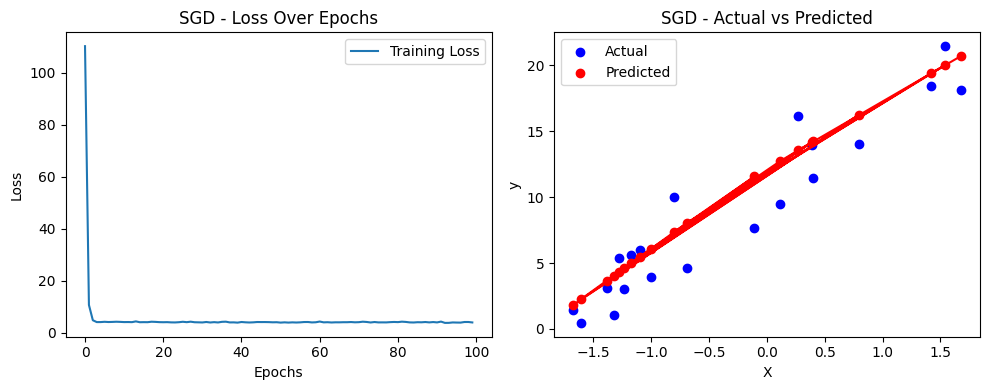

SGD - Mean Squared Error: 4.780615717437566


/Users/akun/.local/share/virtualenvs/ml-HqJ9Cs14/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


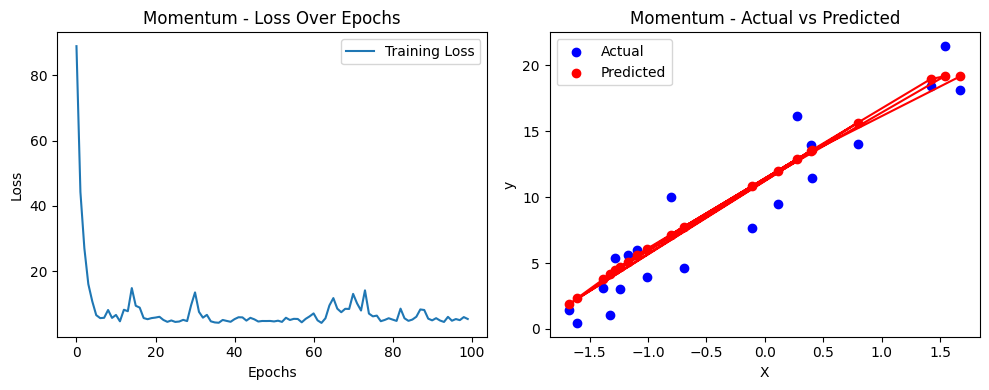

Momentum - Mean Squared Error: 4.108124449685275


/Users/akun/.local/share/virtualenvs/ml-HqJ9Cs14/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


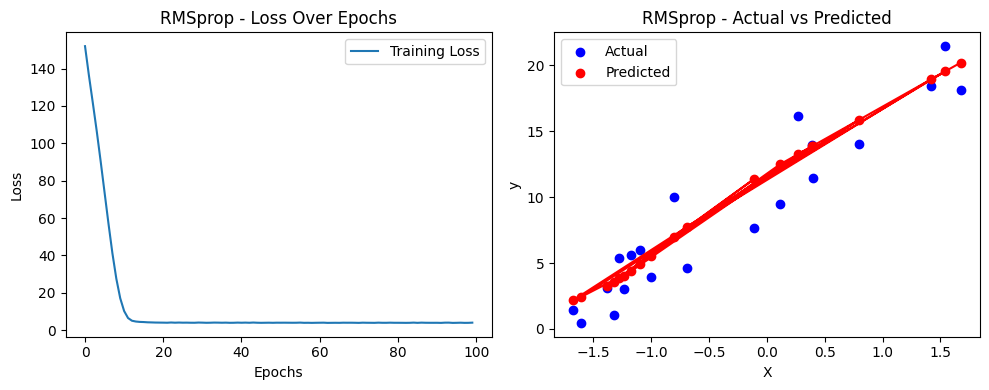

RMSprop - Mean Squared Error: 4.404170809615782


/Users/akun/.local/share/virtualenvs/ml-HqJ9Cs14/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


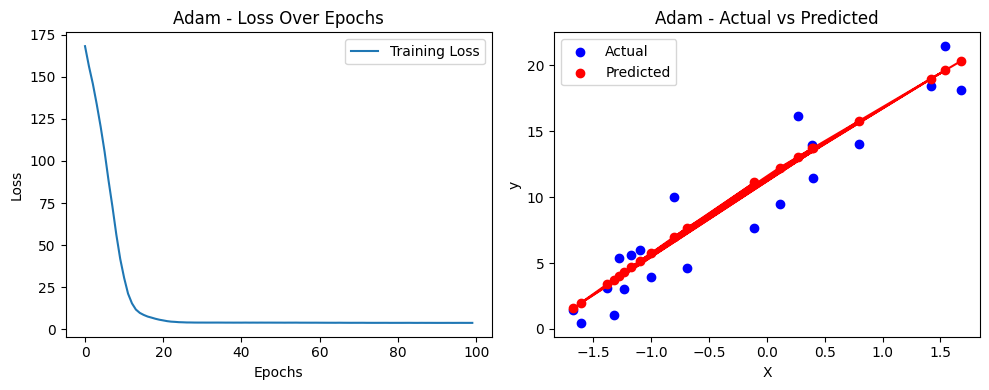

Adam - Mean Squared Error: 4.13737995251992


In [2]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Generate random data

np.random.seed(0)

X = np.random.rand(100, 1) * 10

y = 2 * X + 1 + np.random.randn(100, 1) * 2

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Create a function to build the model


def build_model():

    model = Sequential()

    model.add(Dense(10, input_dim=1, activation="relu"))

    model.add(Dense(1))

    return model


# Define a function to plot results


def plot_results(optimizer_name, history, y_pred, optimizer):

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)

    plt.plot(history.history["loss"], label="Training Loss")

    plt.title(f"{optimizer_name} - Loss Over Epochs")

    plt.xlabel("Epochs")

    plt.ylabel("Loss")

    plt.legend()

    plt.subplot(1, 2, 2)

    plt.scatter(X_test, y_test, color="blue", label="Actual")

    plt.scatter(X_test, y_pred, color="red", label="Predicted")

    plt.plot(X_test, y_pred, color="red")

    plt.title(f"{optimizer_name} - Actual vs Predicted")

    plt.xlabel("X")

    plt.ylabel("y")

    plt.legend()

    plt.tight_layout()

    plt.show()


# Training and evaluation function


def train_and_evaluate(optimizer, optimizer_name):

    model = build_model()

    model.compile(optimizer=optimizer, loss="mean_squared_error")

    history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)

    y_pred = model.predict(X_test)

    plot_results(optimizer_name, history, y_pred, optimizer)

    mse = mean_squared_error(y_test, y_pred)

    print(f"{optimizer_name} - Mean Squared Error: {mse}")


# Define different optimizers

optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "Momentum": SGD(learning_rate=0.01, momentum=0.9),
    "RMSprop": RMSprop(learning_rate=0.01),
    "Adam": Adam(learning_rate=0.01),
}

# Train and evaluate the model with different optimizers

for optimizer_name, optimizer in optimizers.items():

    train_and_evaluate(optimizer, optimizer_name)